# Summary

Objective:
The aim to classify a hex as sparsely or densely populated using the service request data

Methodology:
CRISP-DM as a guideline

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extract

In [17]:
df = pd.read_csv("C:/Users/rosha/Documents/CCT assignment/sr_hex.csv/sr_hex.csv")

In [18]:
df.head()

,notification_number,reference_number,creation_timestamp,completion_timestamp,directorate,department,branch,section,code_group,code,cause_code_group,cause_code,official_suburb,latitude,longitude,h3_level8_index
0,400583534,9.109492e+09,2020-10-07 06:55:18+02:00,2020-10-08 15:36:35+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area Central,District: Blaauwberg,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Wear and tear,MONTAGUE GARDENS,-33.872839,18.522488,88ad360225fffff
1,400555043,9.108995e+09,2020-07-09 16:08:13+02:00,2020-07-14 14:27:01+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,SOMERSET WEST,-34.078916,18.848940,88ad36d5e1fffff
2,400589145,9.109614e+09,2020-10-27 10:21:59+02:00,2020-10-28 17:48:15+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,STRAND,-34.102242,18.821116,88ad36d437fffff
3,400538915,9.108601e+09,2020-03-19 06:36:06+02:00,2021-03-29 20:34:19+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area North,District : Bellville,TD Customer complaint groups,Paint Markings Lines&Signs,Road Markings,Wear and tear,RAVENSMEAD,-33.920019,18.607209,88ad361133fffff
4,400568554,NaN,2020-08-25 09:48:42+02:00,2020-08-31 08:41:13+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area South,District : Athlone,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Surfacing failure,CLAREMONT,-33.987400,18.453760,88ad361709fffff


# Data Understanding

In [19]:
#determines the shape of the dataframe
df.shape

(941634, 16)

In [20]:
df.describe(include = 'all')

,notification_number,reference_number,creation_timestamp,completion_timestamp,directorate,department,branch,section,code_group,code,cause_code_group,cause_code,official_suburb,latitude,longitude,h3_level8_index
count,9.416340e+05,5.929200e+05,941634,929442,932199,932180,913233,848509,941634,941634,131117,131117,729221,729270.000000,729270.000000,941634
unique,NaN,NaN,895979,899486,12,20,39,86,38,492,43,183,775,NaN,NaN,2083
top,NaN,NaN,2020-11-03 08:50:14+02:00,2020-06-16 12:07:54+02:00,WATER AND SANITATION,Electricity Generation and Distribution,Reticulation,Reticulation WW Conveyance,ELECTRICITY TECHNICAL COMPLAINTS,Sewer: Blocked/Overflow,General,Foreign Objects,PHILIPPI,NaN,NaN,0
freq,NaN,NaN,9,83,422834,278117,249234,124392,241017,134429,78197,25030,24647,NaN,NaN,212364
mean,9.978141e+08,9.068970e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.964494,18.580975,NaN
std,1.041692e+08,5.715099e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107055,0.115244,NaN
min,4.005208e+08,2.001336e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.348815,18.319447,NaN
25%,1.015698e+09,9.108640e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.036217,18.496383,NaN
50%,1.015964e+09,9.109075e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.974359,18.569997,NaN
75%,1.016237e+09,9.109528e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.912966,18.652793,NaN


In [9]:
#Check for missing valuesS
100*round(df.isnull().sum()/len(df),4)

notification_number      0.00
reference_number        37.03
creation_timestamp       0.00
completion_timestamp     1.29
directorate              1.00
department               1.00
branch                   3.02
section                  9.89
code_group               0.00
code                     0.00
cause_code_group        86.08
cause_code              86.08
official_suburb         22.56
latitude                22.55
longitude               22.55
h3_level8_index          0.00
dtype: float64

In [21]:
df.dtypes

notification_number       int64
reference_number        float64
creation_timestamp       object
completion_timestamp     object
directorate              object
department               object
branch                   object
section                  object
code_group               object
code                     object
cause_code_group         object
cause_code               object
official_suburb          object
latitude                float64
longitude               float64
h3_level8_index          object
dtype: object

In [27]:
# change data types
df['notification_number'] = df['notification_number'].astype(str)
df['reference_number'] = df['reference_number'].astype(str)
df['creation_timestamp'] = pd.to_datetime(df['creation_timestamp'])
df['completion_timestamp'] = pd.to_datetime(df['completion_timestamp'])

In [22]:
#check updated data types
df.dtypes

notification_number       int64
reference_number        float64
creation_timestamp       object
completion_timestamp     object
directorate              object
department               object
branch                   object
section                  object
code_group               object
code                     object
cause_code_group         object
cause_code               object
official_suburb          object
latitude                float64
longitude               float64
h3_level8_index          object
dtype: object

The data types are:

- notification_number:      categorical - ordinal
- reference_number:         categorical - ordinal
- creation_timestamp:       interval/datetime
- completion_timestamp:     interval/datetime
- directorate:              categorical
- department:               categorical
- branch:                   categorical
- section:                  categorical
- code_group:               categorical
- code:                     categorical
- cause_code_group:         categorical
- cause_code:               categorical
- official_suburb:          categorical
- h3_level8_index:          categorical

## Data Quality Report

The focus is on the categorical vatiables since most of the variables are of categorical types.
The report determines
- missing values :to handle missing values - drop features, impute, case-by-case analysis
- check for cardinality
- max, min, categories that appear the most frequent (mode)

In [ ]:
# cat_cols = ['directorate','department',....]

# data_quality_df = pd.DataFrame(df.dtpes,columns=cat_cols)

Other data exploration practices:
- Visualisation plots to compare variables
- Identify outliers

# Data preparation

## Data cleaning

In [28]:
# remove rows with a '0' hex class as no location data is available to determine the hex. Requests with this class could possibly be in any location and will be ignored for this iteration
filtered_df = df[df['h3_level8_index'] != '0']

## Feature selection

Both the refernce and notification number indicate a service request. It is assumed that the notification number is the log of the request, and the refernce number is the assigned ticket number to process the request.
Thus only one feature is needed.

Feature chosen to remain: notification_number
Reasons: Since we would like to know how many requests were logged and the notification number has no missing values

In [29]:
#drop features

# e.g. remove redunant features: 
# - latitude, longitude because the hex categorises the area and the location data defines the hex

feature_selec_df = filtered_df.drop(labels=['reference_number','latitude', 'longitude','completion_timestamp','directorate'], axis = 1)


In [30]:
feature_selec_df.head()

,notification_number,creation_timestamp,department,branch,section,code_group,code,cause_code_group,cause_code,official_suburb,h3_level8_index
0,400583534,2020-10-07 06:55:18+02:00,Roads Infrastructure Management,RIM Area Central,District: Blaauwberg,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Wear and tear,MONTAGUE GARDENS,88ad360225fffff
1,400555043,2020-07-09 16:08:13+02:00,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,SOMERSET WEST,88ad36d5e1fffff
2,400589145,2020-10-27 10:21:59+02:00,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,STRAND,88ad36d437fffff
3,400538915,2020-03-19 06:36:06+02:00,Roads Infrastructure Management,RIM Area North,District : Bellville,TD Customer complaint groups,Paint Markings Lines&Signs,Road Markings,Wear and tear,RAVENSMEAD,88ad361133fffff
4,400568554,2020-08-25 09:48:42+02:00,Roads Infrastructure Management,RIM Area South,District : Athlone,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Surfacing failure,CLAREMONT,88ad361709fffff


New attributes

In [31]:
#date features
feature_selec_df['month'] = feature_selec_df['creation_timestamp'].dt.month
feature_selec_df['day'] = feature_selec_df['creation_timestamp'].dt.day

In [32]:
feature_selec_df.head()

,notification_number,creation_timestamp,department,branch,section,code_group,code,cause_code_group,cause_code,official_suburb,h3_level8_index,month,day
0,400583534,2020-10-07 06:55:18+02:00,Roads Infrastructure Management,RIM Area Central,District: Blaauwberg,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Wear and tear,MONTAGUE GARDENS,88ad360225fffff,10,7
1,400555043,2020-07-09 16:08:13+02:00,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,SOMERSET WEST,88ad36d5e1fffff,7,9
2,400589145,2020-10-27 10:21:59+02:00,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,STRAND,88ad36d437fffff,10,27
3,400538915,2020-03-19 06:36:06+02:00,Roads Infrastructure Management,RIM Area North,District : Bellville,TD Customer complaint groups,Paint Markings Lines&Signs,Road Markings,Wear and tear,RAVENSMEAD,88ad361133fffff,3,19
4,400568554,2020-08-25 09:48:42+02:00,Roads Infrastructure Management,RIM Area South,District : Athlone,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Surfacing failure,CLAREMONT,88ad361709fffff,8,25


In [33]:
# aggregated features (note: usually a window function would be used in pyspark)
requests_month_df = feature_selec_df.groupby(['h3_level8_index','month'])['notification_number'].agg('count').reset_index()
requests_day_df = feature_selec_df.groupby(['h3_level8_index','day'])['notification_number'].agg('count').reset_index()


Check distribution to determine which aggregation function to utilise
- mean: when the distribution of the data values is symmetrical and there are no clear outliers
- median: when the the distribution of data values is skewed or when there are clear outliers

In [34]:
test_distribution_df = requests_month_df[requests_month_df['h3_level8_index'] == '88ad360001fffff']
plot_test_distribution_df = test_distribution_df[['month','notification_number']]


<AxesSubplot:title={'center':'Number of requests for a month for hex 88ad360001fffff '}, xlabel='month', ylabel='notification_number'>

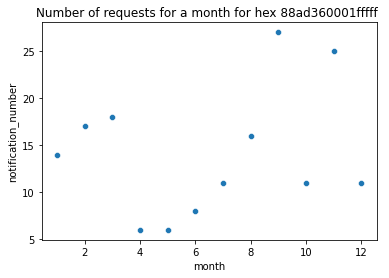

In [35]:
plt.title("Number of requests for a month for hex 88ad360001fffff ")
sns.scatterplot(data=plot_test_distribution_df, x="month", y="notification_number")

In [36]:
#since the distribution over the 12 month period is not symmetric, the median will be used
median_requests_month_df = requests_month_df.groupby(['h3_level8_index'])['notification_number'].agg('median').reset_index()            
median_requests_day_df = requests_day_df.groupby(['h3_level8_index'])['notification_number'].agg('median').reset_index()


#rename columns
median_requests_month_df.rename(columns = {'notification_number':'med_requests_month'}, inplace = True)
median_requests_day_df.rename(columns = {'notification_number':'med_requests_day'}, inplace = True)

In [37]:
median_requests_month_df

,h3_level8_index,med_requests_month
0,88ad360001fffff,12.5
1,88ad360003fffff,4.0
2,88ad360005fffff,45.5
3,88ad360007fffff,34.5
4,88ad36000bfffff,1.0
...,...,...
2077,88ad36d73bfffff,11.5
2078,88ad36d73dfffff,7.5
2079,88bc696c87fffff,1.0
2080,88bc696cabfffff,2.0


In [38]:
median_requests_day_df

,h3_level8_index,med_requests_day
0,88ad360001fffff,5.0
1,88ad360003fffff,2.0
2,88ad360005fffff,19.0
3,88ad360007fffff,14.0
4,88ad36000bfffff,1.0
...,...,...
2077,88ad36d73bfffff,5.0
2078,88ad36d73dfffff,4.0
2079,88bc696c87fffff,1.0
2080,88bc696cabfffff,1.0


In [39]:
suburbs_hex_df = feature_selec_df.groupby(['h3_level8_index'])['official_suburb'].agg('nunique').reset_index()   

In [40]:
suburbs_hex_df

,h3_level8_index,official_suburb
0,88ad360001fffff,2
1,88ad360003fffff,1
2,88ad360005fffff,2
3,88ad360007fffff,2
4,88ad36000bfffff,1
...,...,...
2077,88ad36d73bfffff,5
2078,88ad36d73dfffff,1
2079,88bc696c87fffff,1
2080,88bc696cabfffff,1


In [41]:
requests_suburb_df = feature_selec_df.groupby(['h3_level8_index','official_suburb'])['notification_number'].agg('count').reset_index()

In [42]:
requests_suburb_df

,h3_level8_index,official_suburb,notification_number
0,88ad360001fffff,FLAMINGO VLEI,69
1,88ad360001fffff,TABLE VIEW,101
2,88ad360003fffff,TABLE VIEW,50
3,88ad360005fffff,FLAMINGO VLEI,317
4,88ad360005fffff,TABLE VIEW,282
...,...,...,...
4398,88ad36d73bfffff,GORDONS BAY,7
4399,88ad36d73dfffff,FIRLANDS,115
4400,88bc696c87fffff,HELDERBERG RURAL,1
4401,88bc696cabfffff,HELDERBERG RURAL,4


In [43]:
median_requests_suburb_df = requests_suburb_df.groupby(['h3_level8_index'])['notification_number'].agg('median').reset_index()   

#rename column
median_requests_suburb_df.rename(columns = {'notification_number':'med_requests_per_suburb'}, inplace = True)

In [44]:
median_requests_suburb_df

,h3_level8_index,med_requests_per_suburb
0,88ad360001fffff,85.0
1,88ad360003fffff,50.0
2,88ad360005fffff,299.5
3,88ad360007fffff,206.0
4,88ad36000bfffff,1.0
...,...,...
2075,88ad36d73bfffff,8.0
2076,88ad36d73dfffff,115.0
2077,88bc696c87fffff,1.0
2078,88bc696cabfffff,4.0


## Create final dataset

Create the final dataset by joining all the aggregated data per hex

In [45]:
dataset_df = median_requests_month_df.merge(median_requests_day_df, on= 'h3_level8_index', how = 'inner').merge(median_requests_suburb_df,on= 'h3_level8_index', how = 'inner')

In [46]:
dataset_df

,h3_level8_index,med_requests_month,med_requests_day,med_requests_per_suburb
0,88ad360001fffff,12.5,5.0,85.0
1,88ad360003fffff,4.0,2.0,50.0
2,88ad360005fffff,45.5,19.0,299.5
3,88ad360007fffff,34.5,14.0,206.0
4,88ad36000bfffff,1.0,1.0,1.0
...,...,...,...,...
2075,88ad36d73bfffff,11.5,5.0,8.0
2076,88ad36d73dfffff,7.5,4.0,115.0
2077,88bc696c87fffff,1.0,1.0,1.0
2078,88bc696cabfffff,2.0,1.0,4.0
